In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. description for the dataset
#This dataset gives some features of the cell and there is a class to define these feature: whether this cell is 
#malignant or benign. Since there is no missing data. so I didn't have the process of cleaning the missing data
# However, I built a data map for the purpose that if we want to see any column of the data, we can just type the
# name of the feature instead of counting the feature is in which column.
# 2. The goal for this assignment is to use two model to make the classification. I will use knn and naive bayes to 
# build the models and compare the accuracy of the result. 
cancer = sklearn.datasets.load_breast_cancer()
print(cancer.DESCR)
print(cancer)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
# create a map for the purpose that if we want to see one of the feature in the dataset
data_map = {name:index for index,name in enumerate(cancer.feature_names)}
def show_data(name):
    print(name)
    print(cancer.data[:,data_map[name]])

In [4]:
# to look at the data
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.target)
print(cancer.data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 

In [5]:
# organize the data
label_name = cancer["target_names"]
print(label_name)
label = cancer["target"]
print(label[0])
feature_names = cancer["feature_names"]
print(feature_names[0])
feature = cancer["data"]
print(feature[0])

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [6]:
# create the training data and test data
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(feature,
                                                          label,
                                                          test_size=0.33,
                                                          random_state=38)


In [7]:
# use Knn model to do the prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 19)
model = knn.fit(train, train_labels)

In [15]:
pred = knn.predict(test)
print(pred)
print(test_labels)

[0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0
 1 1 0]
[0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0
 1 1 0]


In [9]:
# to see the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, pred))

0.9414893617021277


In [10]:
# create a confusion matrix to visualize the predictive result
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, pred)

In [21]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, figsize=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (This function is copied from the scikit docs.)
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 60   9]
 [  2 117]]


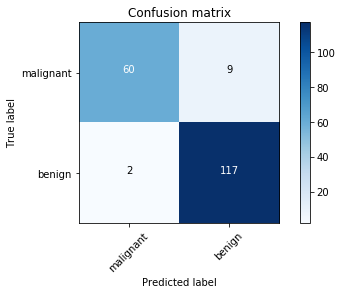

In [22]:
plot_confusion_matrix(cm, label_name)
# This plot is more like a heat map, which we can see the the deeper the color, the bigger the number is.

In [26]:
# use another model to do the prediction: naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)

In [27]:
pred2 = gnb.predict(test)
print(pred2)

[0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 1 0]


In [28]:
# show the accuracy of the result
print(accuracy_score(test_labels, pred2))

0.9361702127659575
